In [10]:
# Load libraries
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, precision_score#Import scikit-learn metrics module for accuracy calculation

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('shop.csv')

In [3]:
#one hot encoding
dummy = pd.get_dummies(df, columns=['Month'], prefix = ['Month'])
dummy = pd.get_dummies(dummy, columns=['VisitorType'], prefix = ['visType'])
#Converting into zeros and ones
dummy['Weekend'] = dummy.Weekend.astype(int)
dummy['Revenue'] = dummy.Revenue.astype(int)

In [4]:
#split dataset in features and target variable
feature_cols = ['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'Weekend',
 'Month_Aug',
 'Month_Dec',
 'Month_Feb',
 'Month_Jul',
 'Month_June',
 'Month_Mar',
 'Month_May',
 'Month_Nov',
 'Month_Oct',
 'Month_Sep',
 'visType_New_Visitor',
 'visType_Other',
 'visType_Returning_Visitor']
X = dummy[feature_cols] # Features
y = dummy.Revenue # Target variable

In [5]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


Area Under Curve:  0.7331473194953666


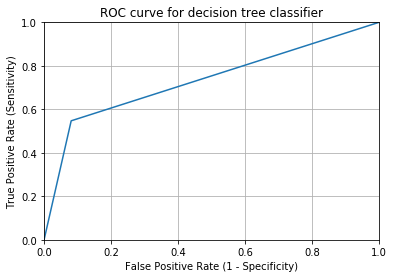

In [8]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

y_pred_prob = clf.predict_proba(X_test)[:, 1]

# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for decision tree classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

# IMPORTANT: first argument is true values, second argument is predicted probabilities
print("Area Under Curve: ",metrics.roc_auc_score(y_test, y_pred_prob))

In [12]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))

Accuracy: 0.8637469586374696
Recall: 0.5472727272727272
Precision:  0.5413669064748201


In [1]:
conf_mat = confusion_matrix(y_test, y_pred)
#both are 0---->top-left---->2877
#predicted 1 but actually 0---->top-right---->272
#predicted 0 but actually 1---->bottom-left---->247
#both are 1---->bottom-right---->303
print("Confusion Matrix: \n   Predicted\n", conf_mat)
print(classification_report(y_test,y_pred))

NameError: name 'confusion_matrix' is not defined

In [2]:
#True positive rate
tpr = conf_mat[1][1]/(conf_mat[1][1]+conf_mat[1][0])
print("True Positive Rate: ", tpr)
#False Positive rate
fpr = conf_mat[0][1]/(conf_mat[0][1]+conf_mat[0][0])
print("False Positive Rate: ", fpr)

NameError: name 'conf_mat' is not defined

In [4]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, precision_score#Import scikit-learn metrics module for accuracy calculation



df = pd.read_csv('shop.csv')
dummy = pd.get_dummies(df, columns=['Month'], prefix = ['Month'])
dummy = pd.get_dummies(dummy, columns=['VisitorType'], prefix = ['visType'])
#Converting into zeros and ones
dummy['Weekend'] = dummy.Weekend.astype(int)
dummy['Revenue'] = dummy.Revenue.astype(int)

feature_cols = ['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'Weekend',
 'Month_Aug',
 'Month_Dec',
 'Month_Feb',
 'Month_Jul',
 'Month_June',
 'Month_Mar',
 'Month_May',
 'Month_Nov',
 'Month_Oct',
 'Month_Sep',
 'visType_New_Visitor',
 'visType_Other',
 'visType_Returning_Visitor']
X = dummy[feature_cols] # Features
y = dummy.Revenue # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

y_pred_prob = clf.predict_proba(X_test)[:, 1]

# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)


# IMPORTANT: first argument is true values, second argument is predicted probabilities
print("Area Under Curve: ",metrics.roc_auc_score(y_test, y_pred_prob))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
conf_mat = confusion_matrix(y_test, y_pred)
#both are 0---->top-left---->2877
#predicted 1 but actually 0---->top-right---->272
#predicted 0 but actually 1---->bottom-left---->247
#both are 1---->bottom-right---->303
print("Confusion Matrix: \n   Predicted\n", conf_mat)
print(classification_report(y_test,y_pred))

Area Under Curve:  0.7272880279453795
Accuracy: 0.8588807785888077
Recall: 0.54
Precision:  0.5247349823321554
Confusion Matrix: 
   Predicted
 [[2880  269]
 [ 253  297]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      3149
           1       0.52      0.54      0.53       550

    accuracy                           0.86      3699
   macro avg       0.72      0.73      0.72      3699
weighted avg       0.86      0.86      0.86      3699

